In [1]:
########################################################
# All rights reserved. 
# Author: XIE Zhengwei @ Beijing Gigaceuticals Tech Co., Ltd 
#                      @ Peking University International Cancer Institute
# Contact: xiezhengwei@gmail.com
#
#
########################################################

import sys
import os
import rdkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.Fingerprints import FingerprintMols

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy.stats import gaussian_kde

def density(x,y):
    xy = np.vstack([x,y])
    return gaussian_kde(xy)(xy)

# NASH virtualization

In [2]:
#db_em = TSNE(n_components=2).fit_transform(cdk_db.values)
db_em = pd.read_csv('../freeze_data/db_tSNE_xy.csv')
db_em = db_em.set_index('Unnamed: 0')
db_em = db_em.values

In [3]:
nashiii = pd.read_csv('../freeze_data/DB_NASH_III.csv',index_col=0)

nash_score = nashiii['score']
idx = nash_score == -2.0
nash_score[idx] = 0

nashneg =[3447,8865,8523,530]

nashpos =[854,329,714]
#nashposIV =[]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  """


In [4]:
#!pip install scienceplots
#After run the above line, you need to restart the kernel
#!pip install matplotlib==3.3.2

/opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 

examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.

  "found relative to the 'datapath' directory.".format(key))


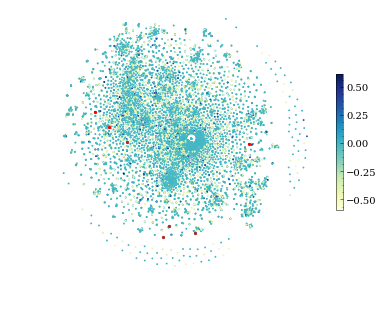

In [5]:
with plt.style.context(['science','no-latex']):
    fig=plt.figure(figsize=(6,5))
    #ax = plt.axes()
    ax=plt.scatter(db_em[:,0], db_em[:,1],marker='.',s=3,c=nash_score.values,cmap=plt.get_cmap("YlGnBu"))
    #plt.scatter(d_em[overlap,0], d_em[overlap,1],marker='.',s=10,color='brown')
    plt.scatter(db_em[nashpos,0], db_em[nashpos,1],marker='.',s=20,color='r')
    plt.scatter(db_em[nashneg,0], db_em[nashneg,1],marker='.',s=20,color='brown')
    plt.xlabel('tSNE 1')    
    plt.ylabel('tSNE 2')    
    
    #cax = fig.add_axes([ax.get_position().x1+0.1,ax.get_position().y0,0.02,ax.get_position().height*0.5])

    cbar = fig.colorbar(ax,shrink=0.5)#fraction=0.046, pad=0.04,
    plt.axis('off')

plt.show()
#plt.savefig('Figures/DBonly_NASHIII_tSNE.svg', format='svg')

In [6]:
nashiv = pd.read_csv('../freeze_data/DB_NASH_IV.csv',index_col=0)

In [7]:
nash_score = nashiv['score']

In [8]:
idx = nash_score == -2.0

In [9]:
nash_score[idx] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  """Entry point for launching an IPython kernel.


In [10]:
nash_score

0       -0.000000

1       -0.000000

2        0.267710

3        0.276260

4        0.342671

           ...   

11289    0.000000

11290    0.000000

11291    0.000000

11292    0.000000

11293    0.000000

Name: score, Length: 11294, dtype: float64

In [11]:
#pd.DataFrame(db_em).to_csv('../freeze_data/db_tSNE_xy.csv')

# Browning virtualization

In [12]:
brn = pd.read_csv('../freeze_data/browning_CDK_fingureprints.txt',sep=' ')

In [13]:
brn

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1015,V1016,V1017,V1018,V1019,V1020,V1021,V1022,V1023,V1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2698,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
brn_em = TSNE(n_components=2).fit_transform(brn.values)

In [15]:
brn_mtx = pd.read_csv('../freeze_data/Browning_matrix_up100_down_100_withSmile_rank1.csv',index_col=1)

In [16]:
brn_white = pd.read_csv('../freeze_data/Browning_white_2_ranklist_withSmile.csv',index_col=1)

In [17]:
brn_mtx

,ID,Name,cas,cs,Smiles
index,,,,,
1858,T2S2044,brusatol,14907-98-3,0.319068,CC1=C(C(=O)CC2(C1CC3C45C2C(C(C(C4C(C(=O)O3)OC(...
1600,T2S1767,Narciclasine,29477-83-6,0.312114,C1OC2=C(O1)C(=C3C(=C2)C4=CC(C(C(C4NC3=O)O)O)O)O
1536,T3S1701,Dihydrocurcumin,76474-56-1,0.302668,COC1=C(C=CC(=C1)CCC(=O)CC(=O)C=CC2=CC(=C(C=C2)...
967,T3S1052,Triptonine B,168009-85-6,0.302414,CC1CCC(=O)C(C(=O)OCC23C(C(C4C(C25C(C(C(C3OC(=O...
1549,T7S1695,Curcumin,458-37-7,0.297602,COC1=C(O)C=CC(C=CC(=O)CC(=O)C=CC2=CC(OC)=C(O)C...
...,...,...,...,...,...
2503,T2O2792,L-Arabinose,87-72-9,-0.260778,OC1COC(O)C(O)C1O
1678,TCS1857,Phenylacetaldehyde,122-78-1,-0.273443,C1=CC=C(C=C1)CC=O
2643,T2P2817,Azelaic acid,123-99-9,-0.274992,OC(=O)CCCCCCCC(O)=O


In [18]:
brn_white

,ID,Name,cas,white_list_cs_2,Smiles
index,,,,,
1467,T3S1611,Kuwanon E,68401-05-8,1.159868,CC(=CCCC(=CCC1=C(C=C(C(=C1)C2CC(=O)C3=C(C=C(C=...
219,T6S0231,Hesperetin,520-33-2,1.104035,COC1=C(O)C=C(C=C1)C1CC(=O)C2=C(O)C=C(O)C=C2O1
125,T2S0144,8-Geranyloxypsoralen,7437-55-0,1.100491,CC(=CCCC(=CCOC1=C2C(=CC3=C1OC=C3)C=CC(=O)O2)C)C
2364,TTM2604,Monensin sodium salt,22373-78-0,1.099680,CCC1(CCC(O1)C1(C)CCC2(CC(O)C(C)C(O2)C(C)C(OC)C...
1248,T6S1371,Isovitexin,38953-85-4,1.095219,C1=CC(=CC=C1C2=CC(=O)C3=C(C(=C(C=C3O2)O)C4C(C(...
...,...,...,...,...,...
1475,T5S1598,Mulberroside C,102841-43-0,-0.614243,CC1(C(CC2=C(O1)C=C3C(=C2)C=C(O3)C4=CC(=CC(=C4)...
2064,T6S2271,Vindoline,2182-14-1,-0.660361,CCC12C=CCN3CCC4(C13)C(N(C)C1=C4C=CC(OC)=C1)C(O...
1057,T5S1140,Ganoderic acid B,81907-61-1,-0.714572,CC(CC(=O)CC(C)C(=O)O)C1CC(=O)C2(C1(CC(=O)C3=C2...


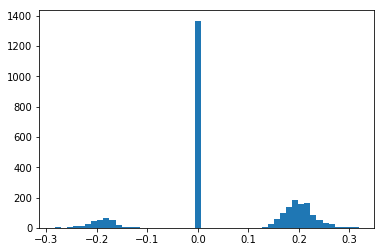

In [19]:
plt.hist(brn_mtx['cs'],50)
plt.show()

In [20]:
np.max(brn_mtx['cs'])

0.319067705

In [21]:
brown_score = brn_mtx.loc[range(brn_mtx.shape[0])]['cs']/np.max(brn_mtx['cs']) + brn_white.loc[range(brn_white.shape[0])]['white_list_cs_2']/np.max(brn_white['white_list_cs_2'])



In [22]:
brown_score

index

0       0.622267

1       0.000000

2       0.000000

3       0.530488

4       0.858170

          ...   

2696    1.138889

2697    0.000000

2698    1.280639

2699    0.645641

2700    0.000000

Length: 2701, dtype: float64

In [23]:
overlap = [130,
 32,
 195,
 963,
 1769,
 1308,
 1166,
 1144,
 53,
 269,
 95,
 1333,
 103,
 830,
 1924,
 1410,
 145,
 2454,
 1411,
 1445,
 342,
 1693]

In [24]:
d = brn_mtx.loc[overlap]

In [25]:
d

,ID,Name,cas,cs,Smiles
index,,,,,
130,T4S0145,Corylifol A,775351-88-7,0.295762,CC(=CCCC(=CCC1=C(C=CC(=C1)C2=COC3=C(C2=O)C=CC(...
32,T2S0031,Levatin,140670-84-4,0.268798,C=C1CCC23CC(CCC2C14CC(OC4=O)C5=COC=C5)OC3=O
195,T3S0208,Hederagenin 28-O-beta-D-glucopyranosyl ester,53931-25-2,0.267367,CC1(CCC2(CCC3(C(=CCC4C3(CCC5C4(CCC(C5(C)CO)O)C...
963,TCS1060,3-O-Acetyloleanderolide,62498-83-3,0.265876,CC(=O)OC1CCC2(C(C1(C)C)CCC3(C2CC(C45C3(CCC6(C4...
1769,T4S1956,7-Ethyl-10-Hydroxycamptothecin,86639-52-3,0.263717,CCC1=C2C=C(O)C=CC2=NC2=C1CN1C2=CC2=C(COC(=O)C2...
1308,TCS1431,Cyclo(Pro-Ala),65556-33-4,0.262169,CC1C(=O)N2CCCC2C(=O)N1
1166,T4S1276,N-p-Coumaroyloctopamine,66648-45-1,0.260739,C1=CC(=CC=C1C=CC(=O)NCC(C2=CC=C(C=C2)O)O)O
1144,T2S1246,Ophiopogonin A,11054-24-3,0.260141,CC1CCC2(C(C3C(O2)CC4C3(CCC5C4CC=C6C5(C(CC(C6)O...
53,T5S0055,Chelidonine,476-32-4,0.257823,CN1CC2=C(C=CC3=C2OCO3)C4C1C5=CC6=C(C=C5CC4O)OCO6


In [26]:
hit=[1924,#Isoginkgetin
    830,#Loureirin B
    269#Chikusetsusaponin IV
    ]

In [27]:
#pd.DataFrame(brn_em).to_csv('Brown_smi_tSNE_coor.csv')

/opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 

examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.

  "found relative to the 'datapath' directory.".format(key))


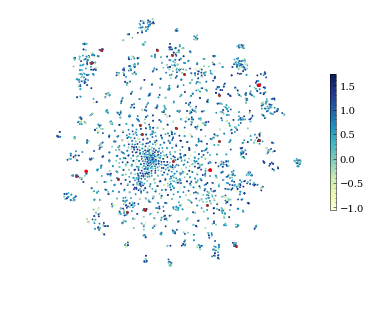

In [28]:
with plt.style.context(['science','no-latex']):
    fig=plt.figure(figsize=(6,5))
    #ax = plt.axes()
    ax=plt.scatter(brn_em[:,0], brn_em[:,1],marker='.',s=3,c=brown_score.values,cmap=plt.get_cmap("YlGnBu"))
    plt.scatter(brn_em[overlap,0], brn_em[overlap,1],marker='.',s=15,color='brown')
    #plt.scatter(db_em[nashpos,0], db_em[nashpos,1],marker='.',s=20,color='r')
    plt.scatter(brn_em[hit,0], brn_em[hit,1],marker='.',s=[20,25,30],color='r')
    plt.xlabel('tSNE 1')    
    plt.ylabel('tSNE 2')    
    
    #cax = fig.add_axes([ax.get_position().x1+0.1,ax.get_position().y0,0.02,ax.get_position().height*0.5])

    cbar = fig.colorbar(ax,shrink=0.5)#fraction=0.046, pad=0.04,
    plt.axis('off')

plt.show()
#plt.savefig('Figures/Browning_tSNE.svg', format='svg')

# HUA

In [29]:
hua = pd.read_csv('../freeze_data/HUA_mice_normalize_csscore.csv')


In [30]:
hua

,ID,Name,CAS Number,cs1_2
0,S1001,Navitoclax (ABT-263),923564-51-6,0.000000
1,S1003,Linifanib (ABT-869),796967-16-3,0.000000
2,S1004,Veliparib (ABT-888),912444-00-9,-0.251215
3,S1005,Axitinib,319460-85-0,0.000000
4,S1006,Saracatinib (AZD0530),379231-04-6,-0.208221
...,...,...,...,...
3675,TTP2993,Panthenol,16485-10-2,0.000000
3676,TTP2996,L-Ornithine,70-26-8,0.000000
3677,T2P2994,4-Aminobutyric acid,1956-12-2,0.000000
3678,TTP2998,Xanthone,90-47-1,0.201806


In [31]:
#plt.hist(hua['cs1_2'],50)
#plt.show()

In [32]:
overlap = [3613, 1989,  943, 2366, 3139, 2309, 3012, 1429, 2266,  294,  244,
       1297, 3337, 2350, 2383, 1381, 3401, 3138, 2442, 1822]

In [33]:
neg = [148, #Marbofloxacin
          379,#Captopril
          786,#Parecoxib
          3325#Mupirocin
          ]

hit = [3139, #Perillen
      1381,#Lobetyolin
      3138, #Deacetyltaxol
      2350#Ginsenoside Compound K
      ]

In [34]:
d_em = pd.read_csv('../freeze_data/d3680_tSNE_xy.csv')
d_em = d_em.set_index('Unnamed: 0')
d_em = d_em.values

/opt/conda/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 

examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.

  "found relative to the 'datapath' directory.".format(key))


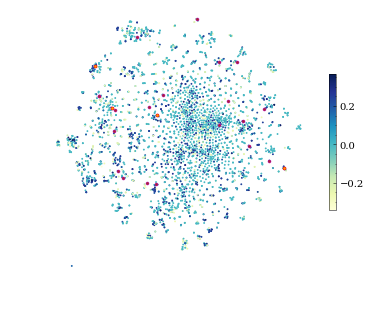

In [35]:
with plt.style.context(['science','no-latex']):
    fig=plt.figure(figsize=(6,5))
    #ax = plt.axes()
    ax=plt.scatter(d_em[:,0], d_em[:,1],marker='.',s=3, c=hua['cs1_2'].values,cmap=plt.get_cmap("YlGnBu"))
    plt.plot(d_em[overlap,0], d_em[overlap,1],'.',mew=0.5, color='m',markerfacecolor='brown')
    plt.plot(d_em[neg,0], d_em[neg,1],'.',mew=0.5,color='m',markerfacecolor='brown')
    plt.plot(d_em[hit,0], d_em[hit,1],'.',mew=0.5,color='r',markerfacecolor='orange')
    plt.xlabel('tSNE 1')    
    plt.ylabel('tSNE 2')    
    
    #cax = fig.add_axes([ax.get_position().x1+0.1,ax.get_position().y0,0.02,ax.get_position().height*0.5])

    cbar = fig.colorbar(ax,shrink=0.5)#fraction=0.046, pad=0.04,
    plt.axis('off')

plt.show()
#plt.savefig('Figures/HUAscore_colored_d3680_2.svg', format='svg')